In [1]:
import gammapy
print(gammapy.__version__ , " == 1")

0.1.dev19174+g56b5bdf  == 1


In [2]:
import numpy as np
import os
import astropy
from astropy import units as u
import matplotlib.pyplot as plt

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

from collections import OrderedDict
from astropy import units
from gammapy.data import DataStore
from astropy.io import fits
from astropy.coordinates import SkyCoord
from gammapy.data import FixedPointingInfo, Observation, DataStore, observatory_locations
from astropy.coordinates import SkyOffsetFrame
from gammapy.maps import WcsNDMap, WcsGeom, MapAxis, Map
from gammapy.makers import MapDatasetMaker, SafeMaskMaker
from gammapy.datasets import MapDataset
from gammapy.irf import load_cta_irfs, EDispKernel, PSFKernel
from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    FoVBackgroundModel,
    PointSpatialModel,
    PowerLawSpectralModel,
    SkyModel,
)
from regions import CircleSkyRegion, RectangleSkyRegion


In [3]:
pks_pos = SkyCoord(frame = "galactic",l =  "17.74 deg", b= "-52.25 deg")
pks_pos = SkyCoord("21h58m43.2s", "-30d13m18s")


In [4]:
try:
    models  = Models.read('../standard_model.yml')
except:
    st_model = SkyModel(spatial_model = PointSpatialModel(lon_0 = pks_pos.l.deg *u.deg, lat_0 =  pks_pos.b.deg * u.deg),
                       spectral_model = PowerLawSpectralModel())
    Models(st_model).write("../standard_model.yml")
    models  = Models.read('../standard_model.yml')
    

In [5]:
dataset_public = MapDataset.read('dataset-stacked.fits.gz')
empty = dataset_public.copy()


path = '/home/wecapstor1/caph/mppi045h/fits_paper_data/std_fullEnclosure/pks2155_steady/out'
data_store = DataStore.from_dir(path, f'hdu-index-bg-v05-fov-radec.fits.gz', f'obs-index-bg-v05-fov-radec.fits.gz')
observations = data_store.get_observations(data_store.obs_ids)


In [6]:
timeobs = []
for obs in observations:
    timeobs.append(obs.obs_info['TSTOP']-obs.obs_info['TSTART'])
timeobs = timeobs * u.s
print(timeobs.to(u.hr))
print(np.sum(timeobs).to(u.hr))

[0.46888889 0.46888889 0.46916667 0.46888889 0.46861111 0.46888889] h
2.8133333333333335 h


In [7]:
angle = []
for obs in observations:
    angle.append(90-obs.obs_info['ALT_PNT'])
np.mean(angle), np.std(angle)

(29.796173349792266, 5.359026500908444)

In [32]:
n_public_runs = len(observations)
location = observatory_locations['hess']

livetime_stereo = 50.089999999999996 *u.hr
livetime_mono = 29.94 * u.hr
livetime_simu = 100 * u.hr # livetime_stereo + livetime_mono
livetime_public =np.sum(timeobs).to(u.hr)
print('public:', livetime_public)
print('simu:', livetime_simu)
def compute_factor(livetime_simu):
    factors =( (livetime_simu/n_public_runs) / timeobs ).to("")
    return factors
factors = compute_factor(livetime_simu)
print("factors", factors)

public: 2.8133333333333335 h
simu: 100.0 h
factors [35.5450237  35.5450237  35.52397869 35.5450237  35.56609366 35.5450237 ]


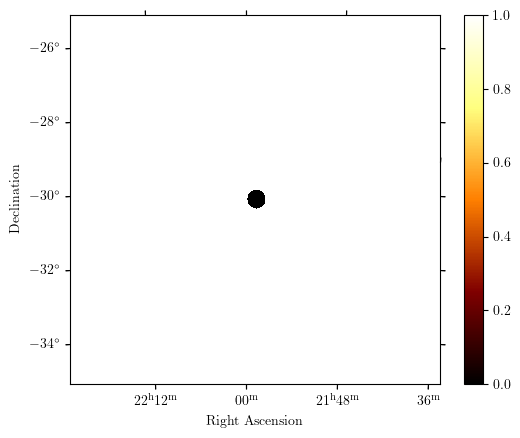

In [9]:

radius = 0.25*u.deg
skyregion = CircleSkyRegion(center=pks_pos, radius=radius)
excl_regions = [skyregion]
geom = dataset_public.geoms['geom']
excl_mask_2d = Map.from_geom(dataset_public.geoms['geom'].to_image(),
                             data=dataset_public.geoms['geom'].to_image().region_mask(excl_regions, inside=False).data)
excl_mask_2d.plot(add_cbar = 1, vmin =0, vmax = 1);

maxthreshold  = 1*u.TeV
ebins = np.logspace(-1,2,25) *u.TeV
max_offset = 2 *u.deg

0


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

1


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

2


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

3


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

4


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

5


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

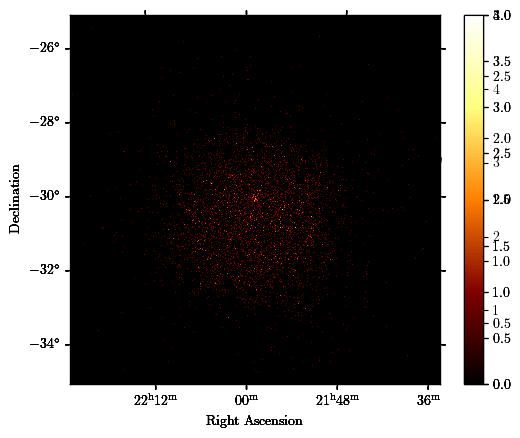

In [30]:
def create(factors):

    datasets = []
    for i in range(n_public_runs ):
        print(i)
        dataset_obs = MapDataset.read(f'dataset-obs-{observations[i].obs_id}.fits.gz')
        dataset_obs.counts.sum_over_axes().plot(add_cbar =1 )    
        irfs = {'bkg':dataset_obs.background,
           'aeff': dataset_obs.exposure * factors[i],#/ livetime ,
           'psf': dataset_obs.psf,
           'edisp': dataset_obs.edisp,
           'rad_max': 4 *u.deg }

        pointing  = observations[i].pointing_radec

        obs = Observation.create(
            pointing=pointing, livetime=timeobs[i], irfs=irfs, location=location
        )

        # Make the MapDataset
        maker = MapDatasetMaker(selection=["exposure", "background", "psf", "edisp"])

        maker_safe_mask = SafeMaskMaker(methods=["offset-max"], offset_max=4.0 * u.deg)
        reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)    

        dataset = maker.run(reference, obs)
        dataset = maker_safe_mask.run(dataset, obs)

        dataset.counts.data = dataset.counts.data.astype(np.float32)
        dataset.psf = dataset_obs.psf
        dataset.edisp = dataset_obs.edisp

        datasets.append(dataset)

    dataset_stacked = datasets[0].copy()
    for d in datasets[1:]:
        dataset_stacked.stack(d)
    return datasets, dataset_stacked
datasets, dataset_stacked = create(factors)


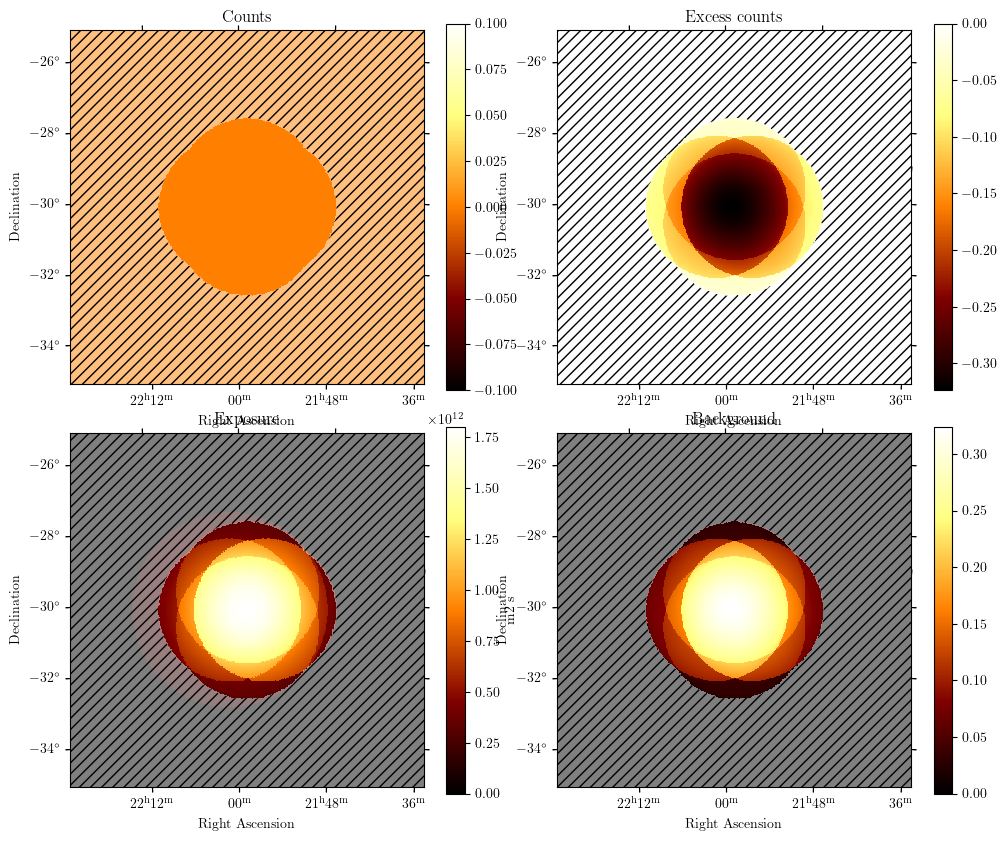

In [28]:
dataset_stacked.peek()

In [12]:
emask = dataset_stacked.mask.data.sum(axis=2).sum(axis=1) >0
emask = dataset_stacked.mask.geom.axes[0].center[emask]

## Creating the models

In [13]:
import operator
from gammapy.modeling.models import (
    PointSpatialModel,
    PowerLawSpectralModel, 
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    GaussianSpectralModel,
    CompoundSpectralModel,
    SkyModel
)

In [14]:
spatial_model = PointSpatialModel(lon_0 = pks_pos.ra, 
                                  lat_0 = pks_pos.dec,
                                  frame= 'icrs')

spatial_model.parameters['lon_0'].max = spatial_model.parameters['lon_0'].value + 1
spatial_model.parameters['lon_0'].min = spatial_model.parameters['lon_0'].value - 1
spatial_model.parameters['lat_0'].max = spatial_model.parameters['lat_0'].value + 1
spatial_model.parameters['lat_0'].min = spatial_model.parameters['lat_0'].value - 1

pks_par = dict()
# https://www.aanda.org/articles/aa/pdf/2005/06/aa1853.pdf
# Time-averaged spectrum
factor  = 1 *u.Unit("m-2").to("cm-2")
a = {'value':4.0e-8*factor, 'error':1.9e-8*factor}
pks_par['amplitude'] = a
index = {'value':3.32, 'error':0.06}
pks_par['index'] = index
ecut = {'value':1.4, 'error':0.8}
lambda_ = {'value':1/ecut['value'], 'error': ecut['error']/ (ecut['value'] **2 )}
pks_par['lambda_'] = lambda_

reference = {'value':1, 'error':0.}
pks_par['reference'] = reference
alpha = {'value':1, 'error':0.}
pks_par['alpha'] = alpha

pkscutoff_model = ExpCutoffPowerLawSpectralModel()
for par in pkscutoff_model.parameters:
    par.value = pks_par[par.name]['value']
    par.error = pks_par[par.name]['error']

    
    
crab_par = dict()
# https://arxiv.org/pdf/1509.02902.pdf
a = {'value':1.79e-10, 'error':0.03e-10}
crab_par['amplitude'] = a
alpha = {'value':2.10, 'error':0.04}
crab_par['alpha'] = alpha
beta = {'value':0.24, 'error':0.01}
crab_par['beta'] = beta
reference = {'value':0.521, 'error':0.0}
crab_par['reference'] = reference
logparabola_model = LogParabolaSpectralModel()
for par in logparabola_model.parameters:
    par.value = crab_par[par.name]['value']
    par.error = crab_par[par.name]['error']

scale = 1
pks_reference = 1 *u.TeV
pks_index = 2.3
crab_amplitude = logparabola_model(pks_reference)    *scale

print(crab_amplitude)
powerlaw_model = PowerLawSpectralModel(
    amplitude =crab_amplitude, 
    index = pks_index,
    reference = pks_reference)
pks_lambda = 1/ (30 * u.TeV)
expcutpowerlaw_model = ExpCutoffPowerLawSpectralModel(
    amplitude = crab_amplitude, 
    index = pks_index,
    reference = pks_reference,
    lambda_ = pks_lambda)
pks_mean = 20*u.TeV
pks_sigma = 0.5 *u.TeV
gaussian_model = GaussianSpectralModel(mean  = pks_mean,
                                      sigma = pks_sigma)
gaussian_model = CompoundSpectralModel(model1 = expcutpowerlaw_model, 
                                      model2 = gaussian_model,
                                      operator = operator.add)

powerlaw = SkyModel(spatial_model = spatial_model,
                    spectral_model = powerlaw_model,
                    name = "PL")

expcutpowerlaw = SkyModel(spatial_model = spatial_model,
                    spectral_model = expcutpowerlaw_model,
                    name = "ECPL")

gaussian = SkyModel(spatial_model = spatial_model,
                    spectral_model = gaussian_model,
                    name = "GPL")

pkscutoff = SkyModel(spatial_model = spatial_model,
                       spectral_model = pkscutoff_model,
                    name = "LP")
gaussian.parameters['amplitude_'].frozen = True
#gaussian.parameters['lambda_'].frozen = True
Models([pkscutoff]).write("model-pks-exp.yaml", overwrite = True)


4.110575798345751e-11 1 / (cm2 s TeV)


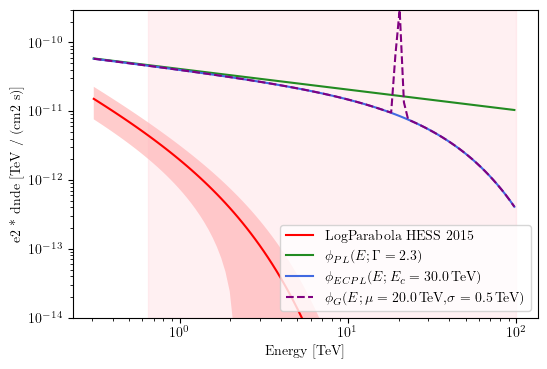

In [15]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
colors = ['red', 'forestgreen', 'royalblue','purple']


energy_bounds = [0.3, 100] *u. TeV
energy_power = 2
pkscutoff_model.plot(energy_bounds,label = "LogParabola HESS 2015",
                      energy_power = energy_power,
                      color = colors[0])
pkscutoff_model.plot_error(energy_bounds, energy_power = energy_power,
                             facecolor = colors[0])

powerlaw_model.plot(energy_bounds,
                    label = "$\phi_{PL}$"+f"$(E; \Gamma = {pks_index}$)",
                   energy_power = energy_power, 
                    color = colors[1])

expcutpowerlaw_model.plot(energy_bounds, 
                        label = "$\phi_{ECPL}$"+f"$(E; E_c = {1/pks_lambda.value}\,$TeV)",
                         energy_power = energy_power,
                          color = colors[2])

gaussian_model.plot(energy_bounds, 
                    label = f"$\phi_G(E; \mu = {pks_mean.value}\,$TeV,$ \sigma = {pks_sigma.value}\,$TeV)",
                   energy_power = energy_power,
                   linestyle = 'dashed', 
                    color  = colors [3])


plt.legend()

plt.ylim(1e-14, 3e-10)
plt.fill_betweenx(ax.get_ylim(), emask[0].value,100, color = 'lightpink', alpha = 0.2)

fig.savefig("plots/2_input_spectra.pdf")

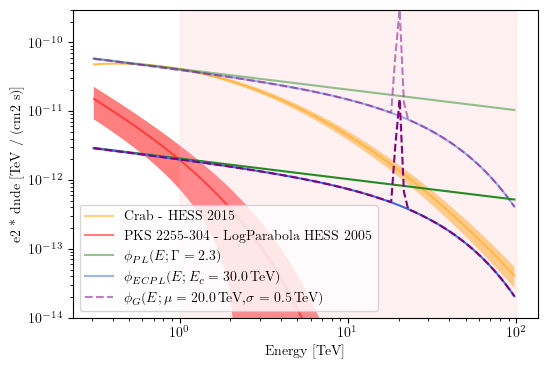

In [16]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
colors = ['red', 'forestgreen', 'royalblue','purple', "orange"]


energy_bounds = [0.3, 100] *u. TeV
energy_power = 2
alpha = 0.5
logparabola_model.plot(energy_bounds,label = "Crab - HESS 2015",
                      energy_power = energy_power,
                      color = colors[-1],
                     alpha = alpha)
logparabola_model.plot_error(energy_bounds, energy_power = energy_power,
                             facecolor = colors[-1],
                           alpha = alpha)


pkscutoff_model.plot(energy_bounds,label = "PKS 2255-304 - LogParabola HESS 2005",
                      energy_power = energy_power,
                      color = colors[0],
                     alpha = alpha)
pkscutoff_model.plot_error(energy_bounds, energy_power = energy_power,
                             facecolor = colors[0],
                           alpha = alpha)

powerlaw_model.plot(energy_bounds,
                    label = "$\phi_{PL}$"+f"$(E; \Gamma = {pks_index}$)",
                   energy_power = energy_power, 
                    color = colors[1],
                    alpha = alpha)

expcutpowerlaw_model.plot(energy_bounds, 
                        label = "$\phi_{ECPL}$"+f"$(E; E_c = {1/pks_lambda.value}\,$TeV)",
                         energy_power = energy_power,
                          color = colors[2],
                          alpha = alpha)

gaussian_model.plot(energy_bounds, 
                    label = f"$\phi_G(E; \mu = {pks_mean.value}\,$TeV,$ \sigma = {pks_sigma.value}\,$TeV)",
                   energy_power = energy_power,
                   linestyle = 'dashed', 
                    color  = colors [3],
                    alpha = alpha),

models  = [powerlaw_model,expcutpowerlaw_model,gaussian_model]
for m in models:
    m.parameters['amplitude'].value = 0.05 * crab_amplitude.value
    if 'amplitude_' in m.parameters.names:
        m.parameters['amplitude_'].value = 0.05 *  1.0000e-12
alpha = 1
powerlaw_model.plot(energy_bounds,
                    label = "",
                   energy_power = energy_power, 
                    color = colors[1],
                   alpha = alpha)

expcutpowerlaw_model.plot(energy_bounds, 
                        label = "",
                         energy_power = energy_power,
                          color = colors[2],
                         alpha = alpha)

gaussian_model.plot(energy_bounds, 
                    label = f"",
                    energy_power = energy_power,
                   linestyle = 'dashed', 
                    color  = colors [3],
                   alpha = alpha)
for m in models:
    m.parameters['amplitude'].value =  crab_amplitude.value
    if 'amplitude_' in m.parameters.names:
        m.parameters['amplitude_'].value =  1.0000e-12
plt.legend()

plt.ylim(1e-14, 3e-10)
plt.fill_betweenx(ax.get_ylim(), 1,100, color = 'lightpink', alpha = 0.2)

fig.savefig("plots/2_input_spectra_weak.pdf")

In [17]:
def plot_par(par1, par2, label,ax = None, fmt ='x', markersize = 6):
    if ax is None:
        fig, ax = plt.subplots(1,1)
    ax.errorbar(x = par1.value, y = par2.value, xerr = par1.error, yerr = par2.error, fmt= fmt,
                markersize = markersize,
                label = label)
    ax.set_xlabel(f"{par1.name} [{par1.unit}] " )
    ax.set_ylabel(f"{par2.name} [{par2.unit}] " )
    ax.legend()
    
    return ax

def plot_source_par(model_name, pars):
    if len(pars)>2:
        fig, ax = plt.subplots(2,2, figsize = (6,6))
        ax = ax.flatten()
    else:
        fig, ax = plt.subplots(1,2, figsize = (6,3))
   
    for i, p in enumerate(pars):
    
        for j, m in enumerate (models_list):
            try:
                plot_par(m[0].parameters[p[0]],
                 m[model_name].parameters[p[1]],
                    label= labels[j],
                    ax = ax[i],
                        fmt = fmts[j],
                        markersize = markersize[j])
            except:
                pass

    plt.tight_layout()

labels = ['simulated', 'recovered pl', 'recovered ecpl']
fmts = ['o','x']
markersize = [6,10]

In [18]:
dataset_pl = dataset_stacked.copy()
dataset_pl.models = powerlaw.copy()
dataset_ecpl = dataset_stacked.copy()
dataset_ecpl.models = expcutpowerlaw.copy()
dataset_plg = dataset_stacked.copy()
dataset_plg.models = gaussian.copy()


dataset_pl.counts = dataset_pl.npred()
dataset_ecpl.counts = dataset_ecpl.npred()
dataset_plg.counts = dataset_plg.npred()

#dataset_pl.fake(28)
#dataset_ecpl.fake(18)
#dataset_plg.fake(8)



In [19]:
dataset_pl.write("dataset-simulated-pl.fits.gz", overwrite = True)
dataset_pl.models.write("model-pl.yaml", overwrite = True)
dataset_ecpl.write("dataset-simulated-ecpl.fits.gz", overwrite = True)
dataset_ecpl.models.write("model-ecpl.yaml", overwrite = True)
dataset_plg.write("dataset-simulated-plg.fits.gz", overwrite = True)
dataset_plg.models.write("model-plg.yaml", overwrite = True)

In [20]:
%%time

fit = Fit()
fit.run([dataset_pl])
fit.run([dataset_ecpl])
fit.run([dataset_plg])

CPU times: user 28.4 s, sys: 2.54 s, total: 30.9 s
Wall time: 31 s


OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization failed.
	nfev       : 110
	total stat : -97935.99

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

/home/wecapstor1/caph/mppi045h/gammapy/gammapy/datasets/map.py:1136: RuntimeWarning: invalid value encountered in true_divide
  yerr = excess_error / np.sqrt(npred_spec.data)


(<WCSAxes: >,
 <Axes: xlabel='Energy [TeV]', ylabel='Residuals ((data - model) / sqrt(model))'>)

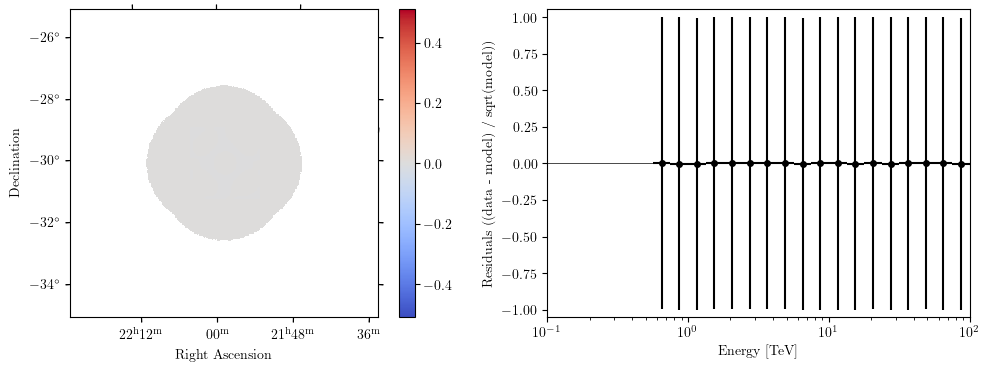

In [21]:
dataset_pl.plot_residuals(kwargs_spatial={'vmax':0.51,
                                      'vmin':-0.51},
                      kwargs_spectral={'method' : 'diff/sqrt(model)'})

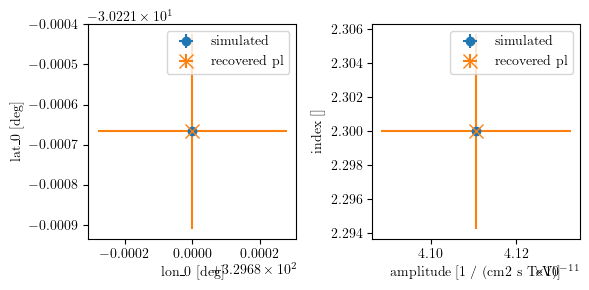

In [22]:
models_list = [Models(powerlaw), dataset_pl.models, ]

pars =  pars = [('lon_0', 'lat_0'),('amplitude', 'index'),]
plot_source_par(0, pars)


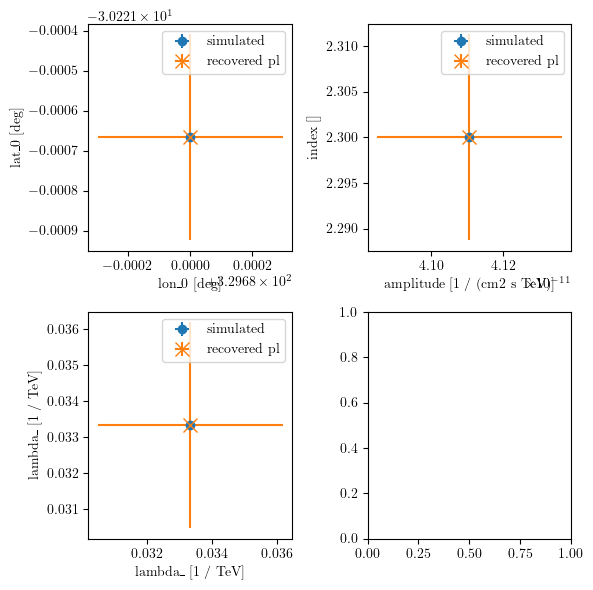

In [23]:
models_list = [Models(expcutpowerlaw), dataset_ecpl.models, ]
pars= [('lon_0', 'lat_0'),('amplitude', 'index'),
                ('lambda_', 'lambda_')]

plot_source_par(0, pars)


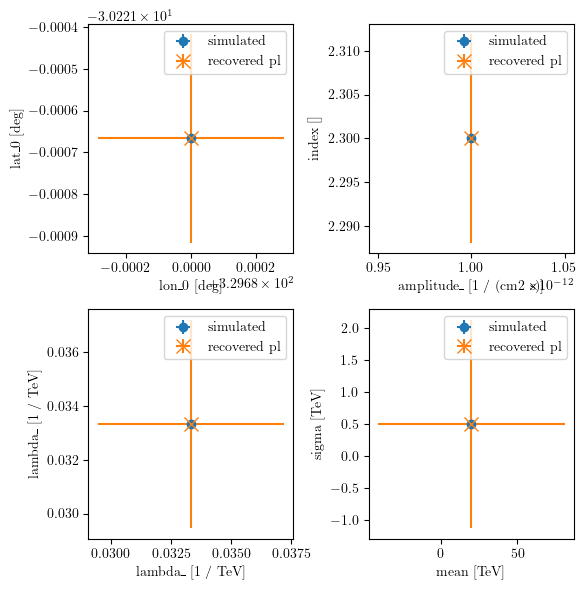

In [24]:
models_list = [Models(gaussian), dataset_plg.models, ]
pars= [('lon_0', 'lat_0'),('amplitude_', 'index'),
                ('lambda_', 'lambda_'), ('mean', 'sigma')]

plot_source_par(0, pars)


[]

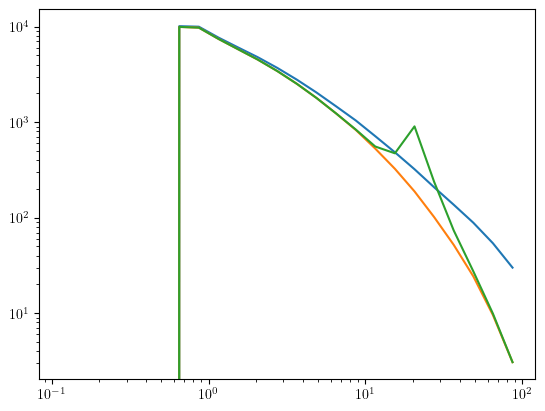

In [25]:
ee = dataset_pl.geoms['geom'].axes[0].center.value
labels = ['PL', 'ECPL', 'G']
datasets = [dataset_pl, dataset_ecpl, dataset_plg]
for i, d in enumerate(datasets):
    plt.plot(ee, 
         (d.counts* d.mask).data.sum(axis=2).sum(axis=1),
            label = labels[i])
plt.loglog()

In [26]:
stat_sums = []
stat_sumsH0 = []

for d in datasets:
    stat_sums.append(d.stat_sum())

    with d.models.parameters.restore_status():
        d.models.parameters['amplitude'].value = 0
        try:
            d.models.parameters['amplitude_'].value = 0
        except:
            pass
        stat_sumsH0.append(d.stat_sum())
        
        
                     

In [27]:
print(stat_sums)
print(stat_sumsH0)
print(np.array(stat_sumsH0) - np.array(stat_sums))
print(np.sqrt(np.array(stat_sumsH0) - np.array(stat_sums)))

[-109338.20203717958, -95712.57871506826, -97935.99184824004]
[377907.2651674365, 345758.532762766, 362751.6178843005]
[487245.46720462 441471.11147783 460687.60973254]
[698.02970367 664.43292474 678.73972164]


## Simulated different observation times 

Livetime:  1.0 h
0


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

1


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

2


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

3


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

4


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

5


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

Livetime:  2.154434690031884 h
0


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

1


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

2


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

3


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

4


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

5


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

Livetime:  4.641588833612778 h
0


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

1


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

2


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

3


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

4


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

5


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

Livetime:  10.0 h
0


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

1


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

2


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

3


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

4


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

5


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

Livetime:  21.544346900318832 h
0


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

1


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

2


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

3


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

4


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

5


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

Livetime:  46.41588833612777 h
0


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

1


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

2


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

3


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

4


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

5


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

Livetime:  100.0 h
0


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

1


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

2


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

3


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

4


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

5


/tmp/ipykernel_1759702/3794389050.py:14: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  pointing  = observations[i].pointing_radec
/home/wecapstor1/caph/mppi045h/gammapy/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/tmp/ipykernel_1759702/3794389050.py:24: GammapyDeprecationWarning: Use observation.get_pointing_icrs(time) instead
  reference = MapDataset.create(geom=geom, name='stacked').cutout(position=obs.pointing_radec, width=8.0*max_offset)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: Use observation.pointing or observation.get_pointing_{altaz,icrs} instead
  val = self.fget(obj)
/home/wecapstor1/caph/mppi045h/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/astropy/utils/decorators.py:841: GammapyDeprecationWarning: The radec function is deprecated and m

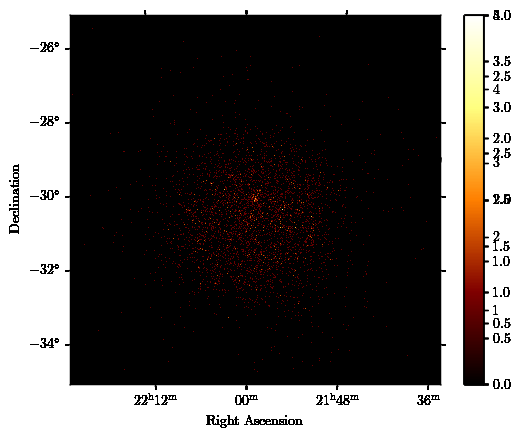

In [35]:
livetime_simus = np.logspace(0, 2, 7) *u.hr

for l in livetime_simus:
    print("Livetime: ", l)
    
    factors_ = compute_factor(l)
    datasets_, dataset_stacked_ = create(factors_)
    dataset_stacked_.write(f"dataset-simulated-{l.value}-hr.fits.gz", overwrite= True)